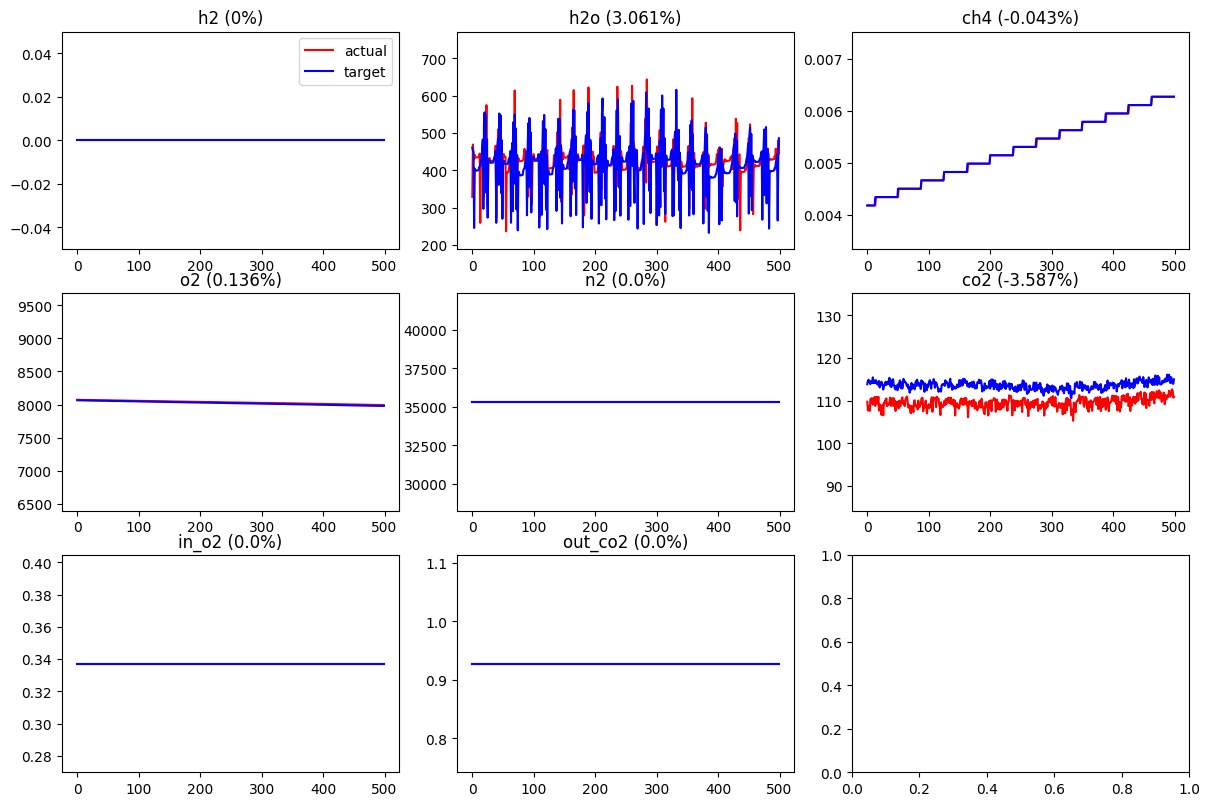

In [23]:
from model_comparison import compare_agent

compare_agent('b2_mission1a', 'greenhouse_b2', ncols=3, i=1000, j=1500)

In [25]:
import json
import datetime
from agent_model import Model

with open('data_files/config_b2_mission1a.json') as f:
    config = json.load(f)
    
start = datetime.datetime.now()
model = Model.from_config(**config)
model.run()
end = datetime.datetime.now()
print('Completed in ', end-start)

Completed in  0:00:06.376468
